In [1]:
!pip install tweety-ns
!pip install pysentimiento
!pip install transformers==4.38.1
!pip install accelerate==0.27.2
!pip install wordcloud

  Using cached accelerate-0.22.0-py3-none-any.whl (251 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.27.2
    Uninstalling accelerate-0.27.2:
      Successfully uninstalled accelerate-0.27.2
  Using cached accelerate-0.27.2-py3-none-any.whl (279 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.22.0
    Uninstalling accelerate-0.22.0:
      Successfully uninstalled accelerate-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysentimiento 0.7.2 requires accelerate<0.23.0,>=0.22.0, but you have accelerate 0.27.2 which is incompatible.


In [2]:
from tweety import Twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from credentials import username_t, password_t
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
class TwitterScraper:
  def __init__(self, username: str, password: str, target: str):
    self.target     = target

    # init session
    self.app        = Twitter("session")
    self.app.start(username, password)
    self.app.sign_in(username, password)

    self.keys = []
    self.df = pd.DataFrame()

  def get_all_keys(self, data):
    keys = set()
    def extract_keys(obj, prefix=""):
      for key, value in obj.items():
        full_key = f"{prefix}.{key}" if prefix else key
        if not isinstance(value, dict):
          keys.add(full_key)
        if isinstance(value, dict):
          extract_keys(value, prefix=full_key)
    for item in data:
      if isinstance(item, dict):
        extract_keys(item)
    self.keys = list(keys)
    return
  def createDataFrame(self, data, keys):
    result_dict = {key: [] for key in keys}
    for item_ in data:
      for key in keys:
        splitted = key.split(".")
        current_value = item_
        try:
          for part in splitted:
            if current_value is not None and part in current_value:
              current_value = current_value[part]
            else:
              current_value = None
              break
          result_dict[key].append(current_value)
        except TypeError:
          result_dict[key].append(None)
    return result_dict

  def processTweets(self, tweets_arr):
    if not self.keys:
      self.get_all_keys(tweets_arr)
    data_df = self.createDataFrame(tweets_arr, self.keys)
    return pd.DataFrame(data_df)

  def joinToDataFrame(self, df_t):
    if self.df.empty:
      self.df = df_t
    else:
      self.df = pd.concat([self.df, df_t], axis=0, ignore_index=True)

  def downloadTargetTweets(self, pages=1, join: bool = True, returnIt:bool=False):
    user = self.app.get_user_info(self.target)
    user_tweets = self.app.get_tweets(user, pages=pages)
    processed = self.processTweets(user_tweets)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

  def downloadTopicTweets(self, topic: str, pages: int = 1, join:bool=True, returnIt:bool=False):
    lookout = self.app.search(topic, pages=pages)
    processed = self.processTweets(lookout)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

## Claudia Sheinbaum

In [4]:
target_t    = "Claudiashein"

cla_tts = TwitterScraper(username_t, password_t, target_t)

In [5]:
cla_tts.downloadTargetTweets()
cla_tts.downloadTopicTweets("Claudia Sheinbaum", pages=2)

In [6]:
cla_tts.df.head()

,quoted_tweet.author.friends_count,quoted_tweet.is_retweeted,quoted_tweet.author.followers_count,broadcast.user_id,quoted_tweet.has_newer_version,broadcast.broadcaster_username,quoted_tweet.community,symbols,broadcast.thumbnail,media,broadcast,author.community_role,author.rest_id,quoted_tweet.quoted_tweet,source,quoted_tweet.author.favourites_count,author.notifications_enabled,author.media_count,community,author.username,broadcast.source,quoted_tweet.is_sensitive,rich_text.media,broadcast.thumbnail_large,bookmark_count,quoted_tweet.author.notifications,author.bio,edit_control.latest_tweet_id,quoted_tweet.can_reply,is_retweet,broadcast.thumbnail_original,author.statuses_count,quoted_tweet.is_quoted,quoted_tweet.rich_text,quoted_tweet.likes,quoted_tweet.author.notifications_enabled,quoted_tweet.place,quoted_tweet.author.location,author.is_blocked,vibe,quoted_tweet.broadcast,quoted_tweet.hashtags,author.date,has_moderated_replies,comments,quoted_tweet.date,broadcast.width,broadcast.media_id,quoted_tweet,edit_control.is_edit_eligible,broadcast.media_key,quoted_tweet.views,quoted_tweet.id,quoted_tweet.source,quoted_tweet.vibe,quoted_tweet.comments,quoted_tweet.author.pinned_tweets,author.screen_name,author.favourites_count,broadcast.id,hashtags,rich_text.text,quoted_tweet.author.name,rich_text.hashtags,quoted_tweet.reply_counts,author.pinned_tweets,quoted_tweet.author.can_dm,date,quoted_tweet.author.possibly_sensitive,quoted_tweet.replied_to,author.description,author.protected,quoted_tweet.quote_counts,broadcast.thumbnail_small,quoted_tweet.author.screen_name,language,author.normal_followers_count,broadcast.url,author.has_custom_timelines,audio_space_id,quoted_tweet.author.community_role,broadcast.broadcaster_name,quoted_tweet.is_retweet,broadcast.thumbnail_x_large,author.notifications,quoted_tweet.user_mentions,quoted_tweet.author.created_at,likes,quoted_tweet.tweet_body,user_mentions,quoted_tweet.urls,quoted_tweet.author.entities.url.urls,quoted_tweet.is_space,quoted_tweet.author.bio,voice_info,quoted_tweet.author.is_translator,quoted_tweet.retweeted_tweet,quoted_tweet.author.description,url,quoted_tweet.community_note,quoted_tweet.voice_info,quoted_tweet.url,author.verified,broadcast.username,quoted_tweet.has_moderated_replies,quoted_tweet.author.entities.description.urls,quoted_tweet.edit_control.is_edit_eligible,created_on,quoted_tweet.author.statuses_count,is_quoted,quoted_tweet.author.listed_count,author.friends_count,author.listed_count,place,quoted_tweet.edit_control.latest_tweet_id,quoted_tweet.edit_control.tweet_ids,rich_text,quoted_tweet.author.following,author.profile_banner_url,id,rich_text.user_mentions,threads,quoted_tweet.author.fast_followers_count,author.can_dm,author.is_translator,quoted_tweet.author.rest_id,quoted_tweet.pool,quoted_tweet.created_on,quoted_tweet.author.username,quoted_tweet.author.profile_url,has_newer_version,quoted_tweet.is_reply,broadcast.state,broadcast.height,quote_counts,is_liked,quoted_tweet.edit_control.edits_remaining,reply_counts,author.possibly_sensitive,rich_text.id,is_sensitive,quoted_tweet.author.profile_banner_url,can_reply,edit_control.tweet_ids,author.created_at,quoted_tweet.audio_space_id,rich_text.tags,retweet_counts,broadcast.broadcaster_id,tweet_body,edit_control.edits_remaining,quoted_tweet.edit_control.is_latest,retweeted_tweet,quoted_tweet.author.verified,quoted_tweet.media,is_retweeted,author.id,author.name,rich_text.urls,author.entities.description.urls,author.translator_type,quoted_tweet.retweet_counts,text,quoted_tweet.threads,is_reply,views,author.followers_count,edit_control.is_latest,pool,broadcast.title,quoted_tweet.bookmark_count,quoted_tweet.author.id,quoted_tweet.is_liked,community_note,quoted_tweet.author.has_custom_timelines,replied_to,quoted_tweet.language,urls,author.profile_interstitial_type,quoted_tweet.author.media_count,is_space,quoted_tweet.symbols,quoted_tweet.author.is_blocked,author.fast_followers_count,author.profile_url,rich_text.symbols,quoted_tw

## Xochitl Galvez

In [7]:
target_t    = "XochitlGalvez"
xo_tts = TwitterScraper(username_t, password_t, target_t)
xo_tts.downloadTargetTweets()
xo_tts.downloadTopicTweets("Xóchitl Gálvez", pages=2)

In [8]:
xo_tts.df.head()

,broadcast.user_id,broadcast.broadcaster_username,symbols,broadcast.thumbnail,media,broadcast,author.community_role,author.rest_id,source,author.notifications_enabled,author.media_count,community,author.username,broadcast.source,rich_text.media,broadcast.thumbnail_large,bookmark_count,author.bio,edit_control.latest_tweet_id,is_retweet,broadcast.thumbnail_original,author.statuses_count,author.is_blocked,vibe,author.date,has_moderated_replies,comments,broadcast.width,broadcast.media_id,all_tweets_id,quoted_tweet,edit_control.is_edit_eligible,broadcast.media_key,author.screen_name,author.favourites_count,broadcast.id,hashtags,rich_text.text,rich_text.hashtags,author.pinned_tweets,date,author.description,author.protected,broadcast.thumbnail_small,language,author.normal_followers_count,broadcast.url,author.has_custom_timelines,audio_space_id,broadcast.broadcaster_name,author.entities.url.urls,broadcast.thumbnail_x_large,author.notifications,likes,user_mentions,tweets,voice_info,url,author.verified,broadcast.username,created_on,is_quoted,author.friends_count,author.listed_count,place,rich_text,author.profile_banner_url,id,rich_text.user_mentions,threads,author.can_dm,author.is_translator,has_newer_version,broadcast.state,broadcast.height,quote_counts,is_liked,reply_counts,author.possibly_sensitive,rich_text.id,is_sensitive,can_reply,edit_control.tweet_ids,author.created_at,broadcast.broadcaster_id,retweet_counts,rich_text.tags,tweet_body,edit_control.edits_remaining,retweeted_tweet,is_retweeted,author.id,author.name,rich_text.urls,author.entities.description.urls,author.translator_type,text,is_reply,views,author.followers_count,edit_control.is_latest,pool,broadcast.title,community_note,replied_to,urls,author.profile_interstitial_type,is_space,author.fast_followers_count,author.profile_url,rich_text.symbols,author.profile_image_url_https,author.following,author.location
0,85437334,XochitlGalvez,[],None,[],{'url': 'https://twitter.com/i/broadcasts/1BRJ...,None,85437334,Periscope,False,6766,None,XochitlGalvez,None,None,None,11,"Mamá, ingeniera, tecnóloga y empresaria. Candi...",1763627900530835643,False,None,51059,False,,2009-10-26 22:40:50+00:00,False,[],1920,None,None,None,True,28_1763627896554577920,XochitlGalvez,68453,1BRJjPRrokLKw,"[{'indices': [111, 122], 'text': 'MxSinMiedo'}...",None,None,[1763549945380930049],2024-03-01 18:10:32+00:00,"Mamá, ingeniera, tecnóloga y empresaria. Candi...",False,None,es,847399,https://twitter.com/i/broadcasts/1BRJjPRrokLKw,True,None,None,"[{'display_url': 'xochitlgalvez.com', 'expande...",None,False,1311,[],None,None,https://twitter.com/XochitlGalvez/status/17636...,False,XochitlGalvez,2024-03-01 18:10:32+00:00,False,6457,2280,None,None,https://pbs.twimg.com/profile_banners/85437334...,1763627900530835643,None,[],None,False,False,ENDED,1080,48,False,154,False,None,False,True,[1763627900530835643],2009-10-26 22:40:50+00:00,85437334,632,None,No nos conformemos con la violencia y la medio...,5,None,False,85437334,Xóchitl Gálvez Ruiz,None,[],none,No nos conformemos con la violencia y la medio...,False,17942,847399,True,None,No nos conformemos con la violencia y la medio...,None,None,[{'display_url': 'twitter.com/i/broadcasts/1…'...,None,False,0,https://twitter.com/XochitlGalvez,None,https://pbs.twimg.com/profile_images/176344410...,False,"Miguel Hidalgo, CDMX"
1,None,None,[],None,"[{'display_url': 'pic.twitter.com/TyVKYEoZR3',...",None,None,85437334,Twitter for iPhone,False,6766,None,XochitlGalvez,None,None,None,17,"Mamá, ingeniera, tecnóloga y empresaria. Candi...",1763616430572924958,False,None,51059,False,,2009-10-26 22:40:50+00:00,False,[],None,None,None,None,True,None,XochitlGalvez,68453,None,"[{'indices': [125, 136], 'text': 'MxSinMiedo'}]",None,None,[1763549945380930049],2024-03-01 17:24:58+00:00,"Mamá, ingeniera, tecnóloga y empresaria. Candi...",False,None,es,847399,None,True,None,None,"[{'display_url': 'xochitlgalvez.com', 'expande...",None,False,2056,[],None,None,https://twitter.com/Xochitl

## Analysis

In [9]:
numeric_user_info = ["author.followers_count", "author.normal_followers_count", "author.friends_count", "author.favourites_count", "author.statuses_count", "author.media_count", "author.listed_count"]
numeric_cols_per_tweet = ["views", "retweet_counts", "quote_counts", "bookmark_count", "reply_counts", "likes"]

In [10]:
df_cla = cla_tts.df
df_xo = xo_tts.df
for col in numeric_user_info + numeric_cols_per_tweet:
  df_cla[col] = pd.to_numeric(df_cla[col], errors="coerce")
  df_xo[col] = pd.to_numeric(df_xo[col], errors="coerce")

In [11]:
cla_vals = []
xo_vals = []
for col in numeric_cols_per_tweet:
  cla_vals.append(df_cla[(df_cla["author.username"] == "Claudiashein")][col].sum())
  xo_vals.append(df_xo[(df_xo["author.username"] == "XochitlGalvez")][col].sum())

In [12]:
barWidth = 0.25
br1 = np.arange(len(cla_vals))
br2 = [x + barWidth for x in br1]

In [13]:
print(cla_vals)
print(xo_vals)

[4264830, 41307, 2993, 1227, 28765, 112426]
[3267670.0, 84385.0, 4354.0, 1095.0, 19939.0, 232562.0]


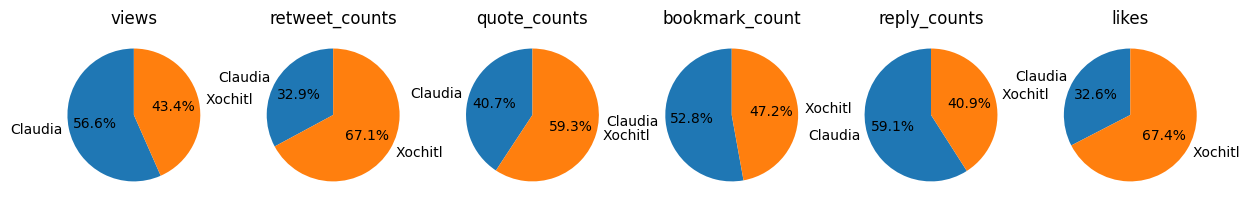

In [14]:
fig, axs = plt.subplots(1, len(cla_vals), figsize=(15, 5))

for i in range(len(cla_vals)):
    labels = ['Claudia', 'Xochitl']
    values = [cla_vals[i], xo_vals[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_cols_per_tweet[i]}')

plt.show()

In [15]:
clau_bio = df_cla[(df_cla["author.username"] == "Claudiashein")].iloc[[0]][numeric_user_info].to_numpy()[0]
xo_bio = df_xo[(df_xo["author.username"] == "XochitlGalvez")].iloc[[0]][numeric_user_info].to_numpy()[0]

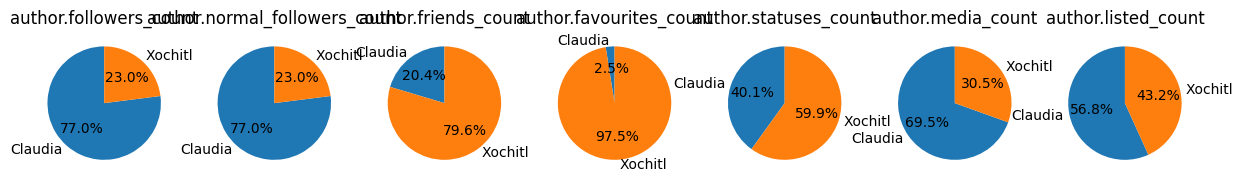

In [16]:
fig, axs = plt.subplots(1, len(clau_bio), figsize=(15, 5))

for i in range(len(clau_bio)):
    labels = ['Claudia', 'Xochitl']
    values = [clau_bio[i], xo_bio[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_user_info[i]}')

plt.show()

## Sentiment Analysis

In [17]:
from pysentimiento.preprocessing import preprocess_tweet
from pysentimiento import create_analyzer

In [18]:
class SentimentAnalyzer:
  def __init__(self):
    self.analyser = create_analyzer(task="sentiment", lang="es")
  def applyPreprocess(self, text_t): return preprocess_tweet(text_t)
  def applyAnalysis(self, text_t): return self.analyser.predict(text_t)
  def applyPipeline(self, text_t):
    text_t = str(text_t)
    result = self.analyser.predict(self.applyPreprocess(text_t))
    #return tuple(self.analyser.predict(preprocess_tweet(text_t)).probas.values()) # NEG, NEU, POS
    return tuple(result.probas.values())

In [19]:
sa_cla = SentimentAnalyzer()
sa_xo = SentimentAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [20]:
df_cla[['NEG', 'NEU', 'POS']] = df_cla['text'].apply(lambda x: pd.Series(sa_cla.applyPipeline(x)))
df_xo[['NEG', 'NEU', 'POS']] = df_xo['text'].apply(lambda x: pd.Series(sa_xo.applyPipeline(x)))

In [21]:
df_xo["text"]

0     No nos conformemos con la violencia y la medio...
1     En esta elección solo hay dos caminos:\n\nCont...
2     ¡Queremos vivir sin miedo!\n\nPara lograrlo va...
3                                                  None
4     Al abrazar a Patricia abrazo a miles de famili...
5     Vamos con toda la fuerza y todo el corazón por...
6     Vamos con toda la fuerza y todo el corazón por...
7                               https://t.co/or0oRBrDiI
8     Vamos con toda la fuerza y todo el corazón por...
9     Por un México sin miedo.\n🩷 💙 ❤️ 💛 💜 https://t...
10    Xóchitl Gálvez\nPresidenta\nCandidata de Fuerz...
11    ¡Llegó el momento que tanto estuvimos esperand...
12    Aquí te cuento cómo será la campaña que arranc...
13    A las 00:01 prendamos nuestras velas para trae...
14    Esta imagen que tomamos en Fresnillo, Zacateca...
15    Así fue la sorpresa que me dieron hoy los Xoch...
16    Ya basta de echarle la culpa al pasado. https:...
17    El desplazamiento de mexicanos a Canadá es

In [22]:
df_cla[["author.username","text", "NEG", "NEU", "POS"]]

,author.username,text,NEG,NEU,POS
0,Claudiashein,Con la Transformación recuperamos el orgullo d...,0.008106,0.036973,0.954922
1,Claudiashein,"¡Vamos a ganar este 2 de junio de 2024, para q...",0.055653,0.276397,0.667950
2,Claudiashein,Tengo claro que el poder es honestidad y humil...,0.038067,0.117707,0.844227
3,Claudiashein,"Les invito a hacer historia, mañana en el Zóca...",0.079522,0.289460,0.631018
4,Claudiashein,Presentamos nuestro gran equipo ganador del 2 ...,0.080476,0.580901,0.338623
5,Claudiashein,#ConferenciaDePrensa | Presentación del equipo...,0.285214,0.546492,0.168294
6,Claudiashein,Agradezco la invitación que me hizo ayer el Cl...,0.018341,0.093765,0.887894
7,Claudiashein,Estoy muy feliz por empezar junto a todas y to...,0.007235,0.046723,0.946043
8,Claudiashein,"El incremento al salario mínimo, los beneficio...",0.890160,0.075535,0.034305
9,Claudiashein,Que las y los trabajadores tengan empleos y sa...,0.039418,0.099918,0.860664


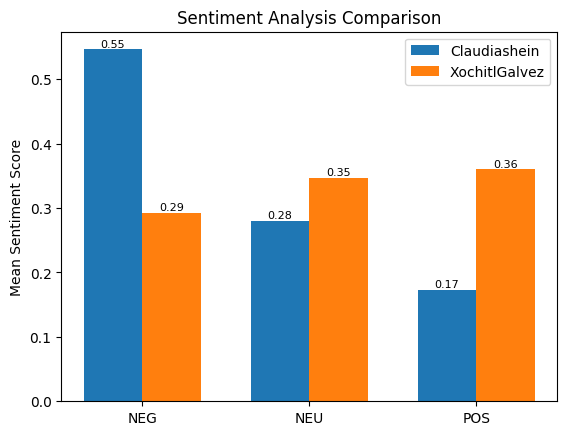

In [23]:
df_cla_mean = df_cla[df_cla["author.username"] != "Claudiashein"][["NEG", "NEU", "POS"]].mean()
df_xo_mean = df_xo[df_xo["author.username"] != "XochitlGalvez"][["NEG", "NEU", "POS"]].mean()

labels = ["NEG", "NEU", "POS"]
users = ["Claudiashein", "XochitlGalvez"]

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(labels))

bar1 = ax.bar(x - width/2, df_cla_mean, width, label="Claudiashein")
bar2 = ax.bar(x + width/2, df_xo_mean, width, label="XochitlGalvez")

ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Sentiment Analysis Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add text annotations
for bar, user in zip([bar1, bar2], users):
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()

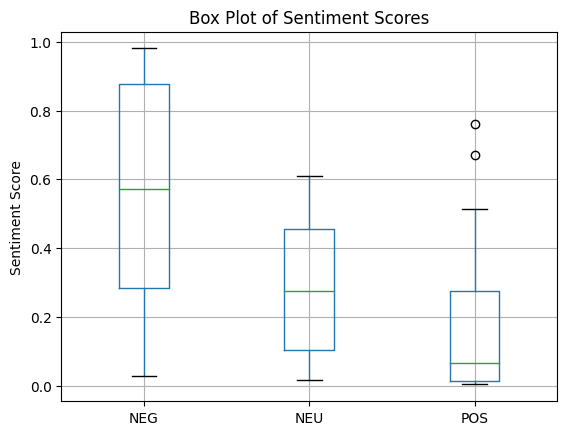

In [24]:
df_cla_subset = df_cla[df_cla["author.username"] != "Claudiashein"][["NEG", "NEU", "POS"]]

# Plotting
fig, ax = plt.subplots()
df_cla_subset.boxplot(ax=ax)

ax.set_ylabel('Sentiment Score')
ax.set_title('Box Plot of Sentiment Scores')
ax.set_xticklabels(['NEG', 'NEU', 'POS'])

plt.show()

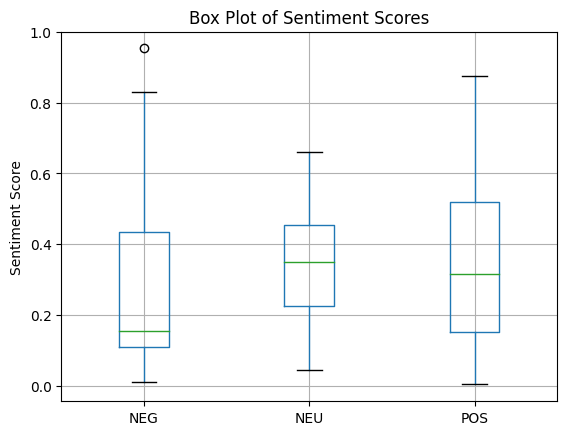

In [25]:
df_xo_subset = df_xo[df_xo["author.username"] != "XochitlGalvez"][["NEG", "NEU", "POS"]]

# Plotting
fig, ax = plt.subplots()
df_xo_subset.boxplot(ax=ax)

ax.set_ylabel('Sentiment Score')
ax.set_title('Box Plot of Sentiment Scores')
ax.set_xticklabels(['NEG', 'NEU', 'POS'])

plt.show()

# Analyze Corpus

In [26]:
import os
from wordcloud import WordCloud
import nltk
from nltk.corpus import PlaintextCorpusReader

from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from time import time
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
corpus_root = "./corpus_save"
os.makedirs(corpus_root, exist_ok=True)

for i, row in df_cla[df_cla["author.username"] != "Claudiashein"].iterrows():
    filename = f"{row['author.username']}_{i}.txt"
    with open(f"{corpus_root}/{filename}", "w", encoding="utf-8") as file:
        file.write(row['text'])

In [29]:
corpus = PlaintextCorpusReader(corpus_root, '.*\.txt')

In [30]:
def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

In [31]:
@timer_func
def scatter_plot_with_title(data_frame, x_column, y_column, title):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.scatter(data_frame[x_column], data_frame[y_column])
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
@timer_func
def get_frequency_corpus(my_corpus):
  frequent_words = {}
  for word in my_corpus.words():
    if word in frequent_words:
      frequent_words[word]+=1
    else:
      frequent_words[word]=1
  keys = list(frequent_words.keys())
  values = list(frequent_words.values())
  sorted_value_index = np.flip(np.argsort(values))
  sorted_dict = [(keys[i], values[i]) for i in sorted_value_index]
  return sorted_dict
@timer_func
def remove_stopwords(frequency_list):
    stop_words = set(stopwords.words("spanish"))
    filtered_tokens = [(token, count) for token,count in frequency_list if token.lower() not in stop_words]
    return filtered_tokens
@timer_func
def clean_alphanumeric(frequency_list):
   return  [(token, count) for token,count in frequency_list if token.isalnum()]
@timer_func
def lowercase_tokens(frequency_list):
  return [(token.lower(), count) for token, count in frequency_list]
@timer_func
def clean_unnecessary_tokens(frequency_list, list_tokens):
  return [(token, count) for token,count in frequency_list if token not in list_tokens]
@timer_func
def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

In [32]:
frequency = get_frequency_corpus(corpus)
frequency[:100]

Function 'get_frequency_corpus' executed in 0.0441s


[('.', 195),
 ('de', 190),
 ('la', 121),
 ('el', 96),
 (',', 94),
 ('a', 86),
 ('y', 73),
 ('https', 73),
 ('://', 73),
 ('t', 73),
 ('co', 73),
 ('/', 73),
 ('Sheinbaum', 67),
 ('#', 66),
 ('Claudia', 62),
 ('que', 60),
 ('en', 50),
 ('para', 37),
 ('del', 34),
 ('con', 33),
 ('Zócalo', 30),
 ('campaña', 28),
 ('por', 25),
 ('al', 23),
 ('un', 22),
 ('las', 20),
 (')', 19),
 ('los', 18),
 ('@', 18),
 ('es', 17),
 ('(@', 17),
 ('-', 16),
 ('su', 16),
 ('se', 15),
 ('✅', 14),
 ('lo', 14),
 ('CDMX', 13),
 ('arranque', 13),
 ('"', 12),
 ('no', 12),
 ('¡', 12),
 ('!', 12),
 ('El', 12),
 (':', 11),
 ('este', 11),
 ('“', 11),
 ('Transformación', 11),
 ('México', 9),
 ('le', 9),
 ('una', 9),
 ('Morena', 9),
 ('?', 9),
 ('”', 9),
 ('horas', 8),
 ('Les', 8),
 ('En', 8),
 ('¿', 8),
 ('pueblo', 7),
 ('acarreo', 7),
 ('apoyo', 7),
 ('son', 7),
 ('inicio', 7),
 ('Coordinador', 7),
 ('ni', 7),
 ('van', 7),
 ('●', 6),
 ('piso', 6),
 ('Alcalde', 6),
 ('ClaudiaSheinbaum', 6),
 ('nuestro', 6),
 ('nuestr

<Axes: xlabel='position', ylabel='count'>

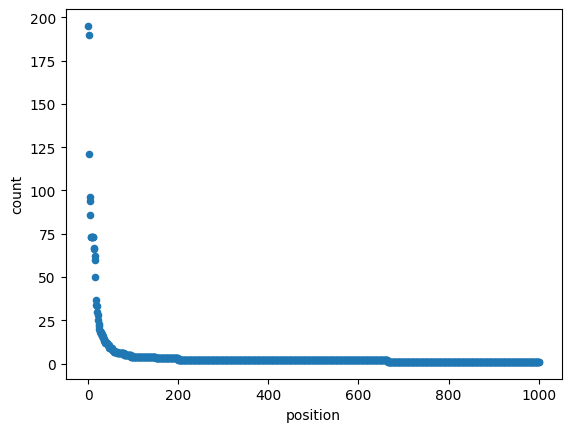

In [33]:
df              = pd.DataFrame(frequency, columns=["token", "count"])
df["position"] = df.apply((lambda x : x.name), axis=1)
df.plot.scatter(x="position", y="count")

<Axes: xlabel='position', ylabel='zipf'>

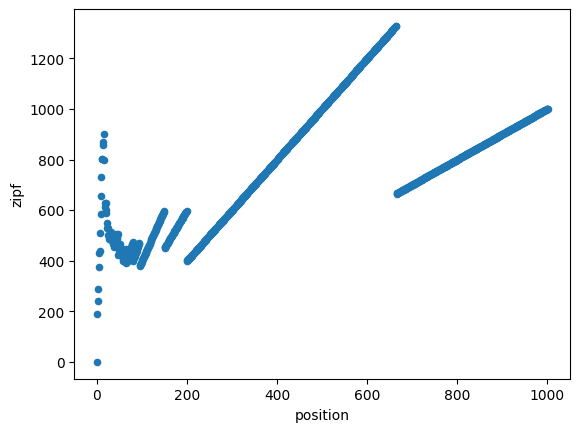

In [34]:
df["zipf"]= df.apply((lambda x: x.name*x["count"]), axis=1)
df.plot.scatter(x='position',y='zipf')

In [35]:
new_frequency = remove_stopwords(frequency)
new_frequency[:20]

Function 'remove_stopwords' executed in 0.0031s


[('.', 195),
 (',', 94),
 ('https', 73),
 ('://', 73),
 ('t', 73),
 ('co', 73),
 ('/', 73),
 ('Sheinbaum', 67),
 ('#', 66),
 ('Claudia', 62),
 ('Zócalo', 30),
 ('campaña', 28),
 (')', 19),
 ('@', 18),
 ('(@', 17),
 ('-', 16),
 ('✅', 14),
 ('CDMX', 13),
 ('arranque', 13),
 ('"', 12)]

In [36]:
new_frequency = clean_alphanumeric(new_frequency)
new_frequency[:20]

Function 'clean_alphanumeric' executed in 0.0027s


[('https', 73),
 ('t', 73),
 ('co', 73),
 ('Sheinbaum', 67),
 ('Claudia', 62),
 ('Zócalo', 30),
 ('campaña', 28),
 ('CDMX', 13),
 ('arranque', 13),
 ('Transformación', 11),
 ('México', 9),
 ('Morena', 9),
 ('horas', 8),
 ('pueblo', 7),
 ('acarreo', 7),
 ('apoyo', 7),
 ('inicio', 7),
 ('Coordinador', 7),
 ('van', 7),
 ('piso', 6)]

In [37]:
tokens_to_remove  = ["co", "t", "https"]
new_frequency     = clean_unnecessary_tokens(new_frequency, tokens_to_remove)

Function 'clean_unnecessary_tokens' executed in 0.0003s


In [38]:
new_frequency     = lowercase_tokens(new_frequency)

Function 'lowercase_tokens' executed in 0.0004s


<Axes: xlabel='position', ylabel='count'>

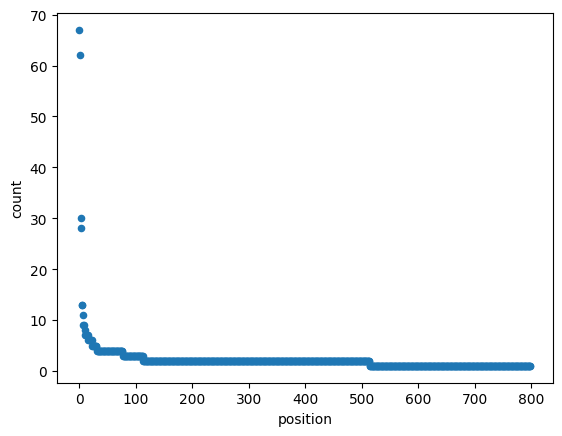

In [39]:
df = pd.DataFrame(new_frequency, columns =['token', 'count'])
df["position"]= df.apply((lambda x: x.name), axis=1)
df.plot.scatter(x='position',y='count')

<Axes: xlabel='position', ylabel='zipf'>

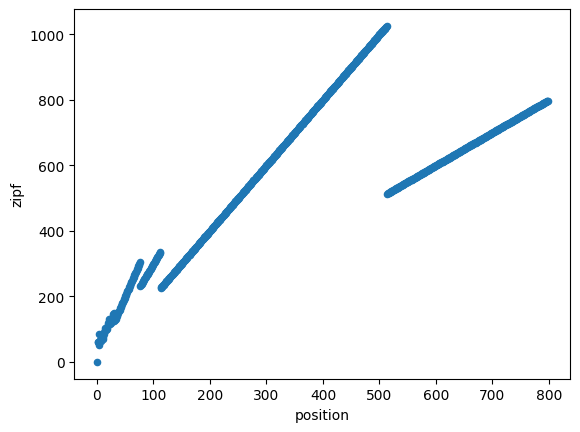

In [40]:
df["zipf"]= df.apply((lambda x: x.name*x["count"]), axis=1)
df.plot.scatter(x='position',y='zipf')

In [41]:
df.head(20)

,token,count,position,zipf
0,sheinbaum,67,0,0
1,claudia,62,1,62
2,zócalo,30,2,60
3,campaña,28,3,84
4,cdmx,13,4,52
5,arranque,13,5,65
6,transformación,11,6,66
7,méxico,9,7,63
8,morena,9,8,72
9,horas,8,9,72


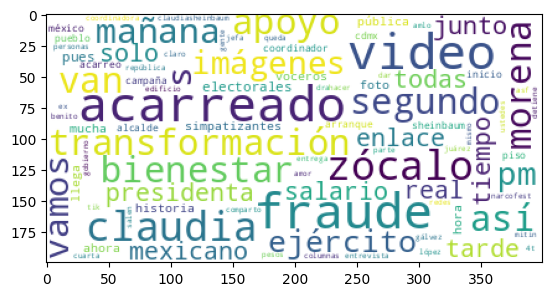

In [42]:
words_from_dataframe = ' '.join(df.values.flatten().astype(str))
oc_cloud= WordCloud(background_color='white', max_words=300,
                    max_font_size=40,random_state=1).generate(words_from_dataframe)
plt.imshow(oc_cloud)